[IPython Notebook](ORB.ipynb) |  [Python Script](ORB.py)

ORB Datasets and Options
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe2
from phoebe2 import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe2.utils.logger(clevel='INFO')

b = phoebe2.Bundle.default_binary()

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Dataset Parameters
--------------------------

Let's create the ParameterSet which would be added to the Bundle when calling add_dataset. Later we'll call add_dataset, which will create and attach this ParameterSet for us.

In [3]:
ps, constraints = phoebe2.dataset.orb()
print ps

time@_default: [] d


### time

In [4]:
print ps['time']

Qualifier: time
Description: Observed times
Value: [] d
Constrained by: 
Constrains: None
Related to: None


### enabled

In [5]:
print ps['enabled']

NO PARAMETERS


Compute Options
------------------

Let's look at the compute options (for the default PHOEBE 2 backend) that relate to dynamics and the ORB dataset

In [6]:
ps_compute = phoebe2.compute.phoebe()
print ps_compute

enabled@_default: True
dynamics_method: keplerian
ltte: False
stepsize: 0.01
orbiterror: 1e-20
store_mesh: False
mesh_method@_default: marching
delta@_default: 0.1
maxpoints@_default: 100000
distortion_method@_default: roche
gridsize@_default: 40
subdiv_num: 3
eclipse_alg: graham
atm@_default: blackbody
lc_method@_default@_default: numerical
rv_method@_default@_default: flux-weighted
rv_grav@_default@_default: False
etv_method@_default@_default: crossing
etv_tol@_default@_default: 0.0001 d


### dynamics_method

In [7]:
print ps_compute['dynamics_method']

Qualifier: dynamics_method
Description: Which method to use to determine the dynamics of components
Value: keplerian
Choices: keplerian, nbody


The 'dynamics_method' parameter controls how stars and components are placed in the coordinate system as a function of time and has several choices:
 * keplerian (default): Use Kepler's laws to determine positions.  If the system has more than two components, then each orbit is treated independently and nested (ie there are no dynamical/tidal effects - the inner orbit is treated as a single point mass in the outer orbit).
 * nbody: Use an n-body integrator to determine positions.  Here the initial conditions (positions and velocities) are still defined by the orbit's Keplerian parameters at 't0@system'.  Closed orbits and orbital stability are not guaranteed and ejections can occur.

### ltte

In [8]:
print ps_compute['ltte']

Qualifier: ltte
Description: Correct for light travel time effects
Value: False


The 'ltte' parameter sets whether light travel time effects (Roemer delay) are included.  If set to False, the positions and velocities are returned as they actually are for that given object at that given time.  If set to True, they are instead returned as they were or will be when their light reaches the origin of the coordinate system.

See the [Systemic Velocity Example Script](../examples/vgamma) for an example of how 'ltte' and 'vgamma' (systemic velocity) interplay.

### orbiterror

The 'orbiterror' parameter is only relevant if dynamics_method=='nbody' (so will not be available unless that is the case)

In [9]:
print ps_compute['orbiterror']

Qualifier: orbiterror
Description: orbiterror for the N-body integrator
Value: 1e-20
Constrained by: 
Constrains: None
Related to: None
Only relevant if: dynamics_method:nbody


### stepsize

The 'stepsize' parameter is also only relevenat if dynamics_method=='nbody' (so will not be available unless that is the case)

In [10]:
print ps_compute['stepsize']

Qualifier: stepsize
Description: stepsize for the N-body integrator
Value: 0.01
Constrained by: 
Constrains: None
Related to: None
Only relevant if: dynamics_method:nbody


Synthetics
------------------

In [11]:
b.add_dataset('ORB', time=np.linspace(0,3,201))

<ParameterSet: 3 parameters | components: _default, primary, secondary>

In [12]:
b.add_compute()

<ParameterSet: 19 parameters | qualifiers: dynamics_method, eclipse_alg, gridsize, stepsize, lc_method, atm, enabled, ltte, rv_grav, orbiterror, rv_method, etv_method, maxpoints, delta, etv_tol, store_mesh, distortion_method, subdiv_num, mesh_method>

In [13]:
b.run_compute()

/home/kyle/.local/lib/python2.7/site-packages/phoebe2/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe2/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe2/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe2/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]


<ParameterSet: 14 parameters | components: primary, secondary>

In [14]:
b['ORB@model'].twigs

['time@primary@orb01@phoebe01@tmpmodel@ORB@model',
 'x@primary@orb01@phoebe01@tmpmodel@ORB@model',
 'y@primary@orb01@phoebe01@tmpmodel@ORB@model',
 'z@primary@orb01@phoebe01@tmpmodel@ORB@model',
 'vx@primary@orb01@phoebe01@tmpmodel@ORB@model',
 'vy@primary@orb01@phoebe01@tmpmodel@ORB@model',
 'vz@primary@orb01@phoebe01@tmpmodel@ORB@model',
 'time@secondary@orb01@phoebe01@tmpmodel@ORB@model',
 'x@secondary@orb01@phoebe01@tmpmodel@ORB@model',
 'y@secondary@orb01@phoebe01@tmpmodel@ORB@model',
 'z@secondary@orb01@phoebe01@tmpmodel@ORB@model',
 'vx@secondary@orb01@phoebe01@tmpmodel@ORB@model',
 'vy@secondary@orb01@phoebe01@tmpmodel@ORB@model',
 'vz@secondary@orb01@phoebe01@tmpmodel@ORB@model']

In [15]:
print b['time@primary@orb01@ORB@model']

Qualifier: time
Description: Synthetic times
Value: [ 0.     0.015  0.03  ...,  2.97   2.985  3.   ] d
Constrained by: 
Constrains: None
Related to: None


In [16]:
print b['x@primary@orb01@ORB@model']

Qualifier: x
Description: X position
Value: [  2.44929360e-16  -1.25643036e-01  -2.51162078e-01 ...,
   2.51162078e-01   1.25643036e-01   4.68582146e-15] solRad
Constrained by: 
Constrains: None
Related to: None


In [17]:
print b['vx@primary@orb01@ORB@model']

Qualifier: vx
Description: X velocity
Value: [-8.37758041 -8.37344658 -8.36104917 ..., -8.36104917 -8.37344658
 -8.37758041] solRad / d
Constrained by: 
Constrains: None
Related to: None


Plotting
---------------

By default, ORB datasets plot as y vx x (plane of sky).  Notice the y-scale here with inclination set to 90.

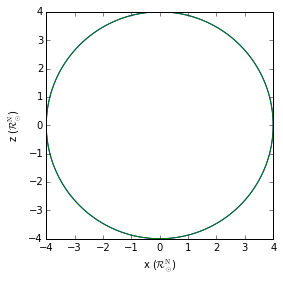

In [18]:
axs, artists = b['ORB@model'].plot()

As always, you have access to any of the arrays for either axes, so if you want to plot vx vs time

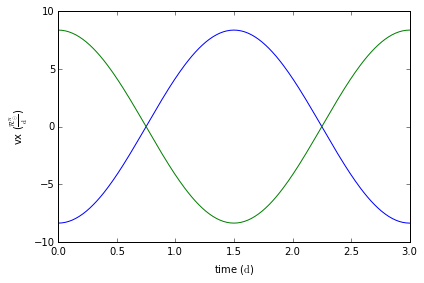

In [19]:
axs, artists = b['ORB@model'].plot(x='time', y='vx')

3d axes are not yet supported for orbits, but hopefully will be soon.

Once they are supported, they will default to x, y, and z positions plotted on their respective axes.

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


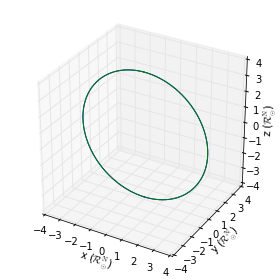

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

axs, artists = b['ORB@model'].plot(xlim=(-4,4), ylim=(-4,4), zlim=(-4,4))